# Ford Go Bike "Trip Data" Dataset Exploration
# UDACITY Communicate Data Findings Third Project
## by Wael Ramzy Mohamed

## Table of Contents
<ul>
    <li><a href="#pr">Preliminary Wrangling</a></li>
    <li><a href="#dc">Data Cleansing</a></li>
    <li><a href="#ue">Univariate Exploration</a></li>
    <li><a href="#be">Bivariate Exploration</a></li>
    <li><a href="#me">Multivariate Exploration</a></li>
</ul>

<hr>

<a id='pr'></a>
## Preliminary Wrangling

About the Ford Go Bike dataset:

The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area of the ford gobike for the year 2018.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
127156,353,2019-02-10 16:38:03.9720,2019-02-10 16:43:57.5360,176.0,MacArthur BART Station,37.828410,-122.266315,210.0,45th St at Manila,37.833294,-122.256224,4676,Subscriber,1951.0,Male,No
66630,321,2019-02-20 08:38:49.0400,2019-02-20 08:44:10.7910,47.0,4th St at Harrison St,37.780955,-122.399749,81.0,Berry St at 4th St,37.775880,-122.393170,5246,Subscriber,1986.0,Male,No
96766,466,2019-02-15 09:47:50.6260,2019-02-15 09:55:37.4590,136.0,23rd St at San Bruno Ave,37.754436,-122.404364,108.0,16th St Mission BART,37.764710,-122.419957,5255,Subscriber,1989.0,Male,No
177731,202,2019-02-01 19:22:39.0040,2019-02-01 19:26:01.8840,116.0,Mississippi St at 17th St,37.764802,-122.394771,126.0,Esprit Park,37.761634,-122.390648,4629,Subscriber,1989.0,Male,No
19564,369,2019-02-26 16:37:56.6680,2019-02-26 16:44:05.6860,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,75.0,Market St at Franklin St,37.773793,-122.421239,6501,Subscriber,1998.0,Male,No


In [4]:
# Get the dataset information about the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

<hr>

<a id='dc'></a>

### Data Cleansing

In [5]:
# Convert the data type of the date and time column form object to date and time.
df['start_time'] = pd.to_datetime(df['start_time'])

In [6]:
# Check conversion
df.info()
df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  object        
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
12871,540,2019-02-27 17:08:58.919,2019-02-27 17:17:59.8870,89.0,Division St at Potrero Ave,37.769218,-122.407646,109.0,17th St at Valencia St,37.763316,-122.421904,5149,Subscriber,1991.0,Female,No
155209,409,2019-02-06 09:00:31.103,2019-02-06 09:07:20.3540,308.0,San Pedro Square,37.336802,-121.894090,341.0,Fountain Alley at S 2nd St,37.336188,-121.889277,3812,Subscriber,1992.0,Female,Yes
114852,510,2019-02-12 09:08:44.600,2019-02-12 09:17:15.3950,121.0,Mission Playground,37.759210,-122.421339,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,6225,Subscriber,1986.0,Male,No


In [7]:
# Get the null columns
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
# Drop all rows with the null valus
df.dropna(axis=0,inplace=True)
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [9]:
# Check the data after delete the null rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  object        
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [10]:
# Convert the float type of the member_birth_year integer.
df['member_birth_year'] = df.member_birth_year.astype('int64')
# Check conversion
df.info()
df.sample(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  object        
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
85818,420,2019-02-17 14:18:07.768,2019-02-17 14:25:07.8880,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,27.0,Beale St at Harrison St,37.788059,-122.391865,5017,Subscriber,1995,Male,No
105356,774,2019-02-14 06:51:24.707,2019-02-14 07:04:19.2180,50.0,2nd St at Townsend St,37.780526,-122.390288,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2324,Subscriber,1965,Male,No
46144,835,2019-02-22 10:08:50.932,2019-02-22 10:22:46.8340,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,4941,Subscriber,1968,Male,No


### What is the structure of your dataset?

The Ford Go Bike dataset contains after cleansing 174952 rows with the 16 columns in the follwing details:
- Trip Duration (seconds)   (Type int64)         
- Start Time and Date       (Type datetime64)
- End Time and Date         (Type object)        
- Start Station ID          (Type float64)       
- Start Station Name        (Type object)        
- Start Station Latitude    (Type float64)
- Start Station Longitude   (Type float64)
- End Station ID            (Type float64)
- End Station Name          (Type object)        
- End Station Latitude      (Type float64)
- End Station Longitude     (Type float64)
- Bike ID                   (Type int64)         
- User Type (“Subscriber” = Member or “Customer” = Casual)  (Type object) 
- Member Year of Birth      (Type int64)
- Member Gender             (Type object)
- Bike Share for all Trip   (Type object)

### What is/are the main feature(s) of interest in your dataset?

I think the main feature is the duration of the trip where is thie feature will help us to figure out some important insights, the type of user, and the member gender. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the User type, Member birth year, and Member gender will effect of the duration of the trip and bike usage.

<hr>

<a id='ue'></a>
## Univariate Exploration

> In this section, investigate distributions of individual variables.

We will study the distribution of the main variables of interest:
First: the distribution of the users types.

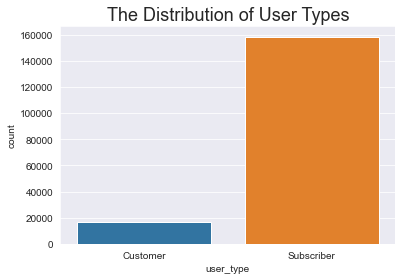

In [11]:
sb.set_style('darkgrid')
sb.countplot(data=df,x='user_type')
plt.title("The Distribution of User Types",fontsize=18)
plt.axis('on');

In order to show the difference, we will try the pie chart "matplotlib.pyplot":

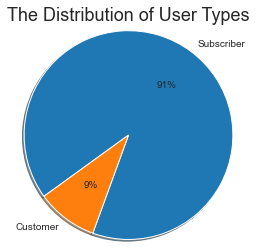

In [12]:
UserTypes_Count = df['user_type'].value_counts()
plt.pie(UserTypes_Count, labels = UserTypes_Count.index, autopct='%1.0f%%', shadow = True, radius = 1.2, startangle = 250)
plt.title("The Distribution of User Types",fontsize=18)
plt.axis('off');

#### Observation: From the last charts we discover that, the subscrider users use the bikes 90% of the customer potential users.

Second: the distribution of the Members gender.

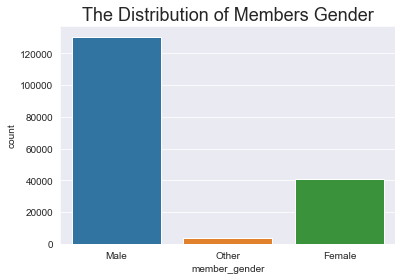

In [13]:
sb.set_style('darkgrid')
sb.countplot(data=df,x='member_gender')
plt.title("The Distribution of Members Gender",fontsize=18)
plt.axis('on');

In order to show the difference, we will try the pie chart "matplotlib.pyplot":

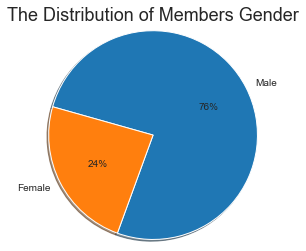

In [14]:
UserTypes_Count = df['member_gender'].value_counts()
UserTypes_Count = UserTypes_Count[:2]
plt.pie(UserTypes_Count[:2], labels = UserTypes_Count.index, autopct='%1.0f%%', shadow = True, radius = 1.2, startangle = 250)
plt.title("The Distribution of Members Gender",fontsize=18)
plt.axis('off');

#### Observation: From the last charts we discover that, the male users are the most users for the bikes with percentage 76%.

Third: We will try to figure out the day in the week the usage of bike increase the the time decreased.

In [15]:
# Extract the day from the date
df['Using_Bike_dayofWeek']=df['start_time'].dt.strftime('%a')
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Using_Bike_dayofWeek
20041,366,2019-02-26 14:25:13.579,2019-02-26 14:31:19.6510,90.0,Townsend St at 7th St,37.771058,-122.402717,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,6555,Subscriber,1992,Male,No,Tue
52642,381,2019-02-21 17:02:38.839,2019-02-21 17:09:00.4270,182.0,19th Street BART Station,37.809013,-122.268247,178.0,Broadway at 30th St,37.819381,-122.261928,4486,Customer,1983,Female,No,Thu
159475,495,2019-02-05 17:56:45.454,2019-02-05 18:05:00.9040,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,77.0,11th St at Natoma St,37.773507,-122.416040,5255,Customer,1993,Male,No,Tue
133763,1038,2019-02-08 18:14:16.591,2019-02-08 18:31:34.6610,36.0,Folsom St at 3rd St,37.783830,-122.398870,14.0,Clay St at Battery St,37.795001,-122.399970,5479,Subscriber,1972,Male,No,Fri
10809,342,2019-02-27 19:39:26.196,2019-02-27 19:45:08.2730,241.0,Ashby BART Station,37.852477,-122.270213,268.0,Ellsworth St at Russell St,37.857490,-122.261578,3583,Subscriber,1985,Female,No,Wed
17156,779,2019-02-27 07:26:22.844,2019-02-27 07:39:21.8490,323.0,Broadway at Kearny,37.798014,-122.405950,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5972,Subscriber,1993,Female,No,Wed
52291,239,2019-02-21 17:24:17.649,2019-02-21 17:28:17.4060,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3635,Subscriber,1989,Male,No,Thu
85147,4321,2019-02-17 14:50:34.304,2019-02-17 16:02:35.5800,112.0,Harrison St at 17th St,37.763847,-122.413004,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4742,Subscriber,1987,Male,No,Sun
117041,230,2019-02-12 06:26:58.611,2019-02-12 06:30:48.8670,70.0,Central Ave at Fell St,37.773311,-122.444293,73.0,Pierce St at Haight St,37.771793,-122.433708,4943,Subscriber,1987,Male,No,Tue
72967,934,2019-02-19 15:06:59.000,2019-02-19 15:22:33.1040,343.0,Bryant St at 2nd St,37.783172,-122.393572,101.0,15th St at Potrero Ave,37.767079,-122.407359,5084,Subscriber,1990,Female,No,Tue


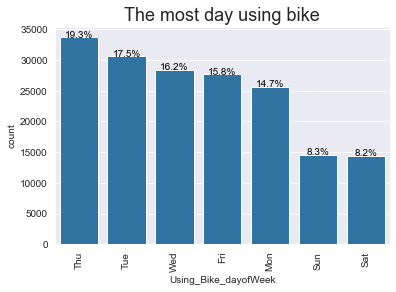

In [16]:
type_counts = df['Using_Bike_dayofWeek'].value_counts()
type_order = type_counts.index
base_color = sb.color_palette()[0]
sb.set_style('darkgrid')
sb.countplot(data=df,x='Using_Bike_dayofWeek', color=base_color, order=type_order)
plt.title("The most day using bike",fontsize=18)
plt.axis('on');

# set the percentage in the top of the bar
rides = df['Using_Bike_dayofWeek'].value_counts().sum()
locs, labels = plt.xticks(rotation=90)  
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/rides)
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

#### Observation: From the last charts we discover that, The Thusday "middel of the week" is the most day users using the bike and during the week end the using of the bike decresed under 50% of usage.

Fourth: we will study the location of start and end trib.

Text(0.5, 0.98, 'Distribution of start and end trip location')

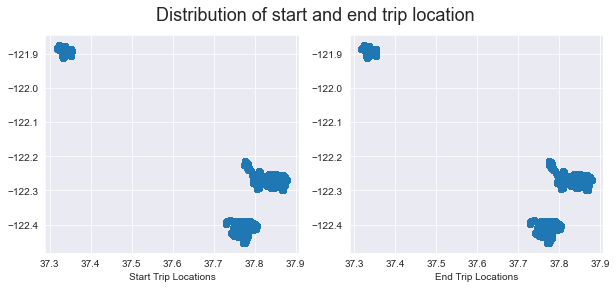

In [17]:
# Show the distribution of start and end location.

plt.figure(figsize=[10, 4])
plt.subplot(1, 2, 1)
plt.scatter(data=df, x='start_station_latitude', y='start_station_longitude')
plt.xlabel('Start Trip Locations')
plt.subplot(1, 2, 2)
plt.scatter(data=df, x='end_station_latitude', y='end_station_longitude')
plt.xlabel('End Trip Locations');
plt.suptitle('Distribution of start and end trip location', fontsize=18)

#### Observation: From the last charts we discovered that, in this period there is 3 main area concerned with all trips two of them are nearest.

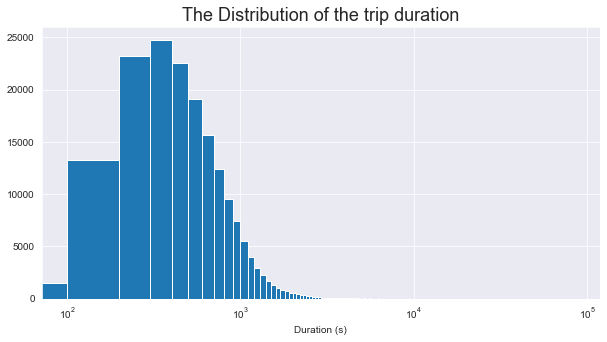

In [18]:
# The Distribution of the trip duration histogram
bins = np.arange(0, df['duration_sec'].max()+100, 100)
plt.figure(figsize=[10, 5])
plt.title('The Distribution of the trip duration', fontsize=18)
plt.hist(data=df, x='duration_sec', bins=bins)
plt.xscale('log')

plt.xlabel('Duration (s)');

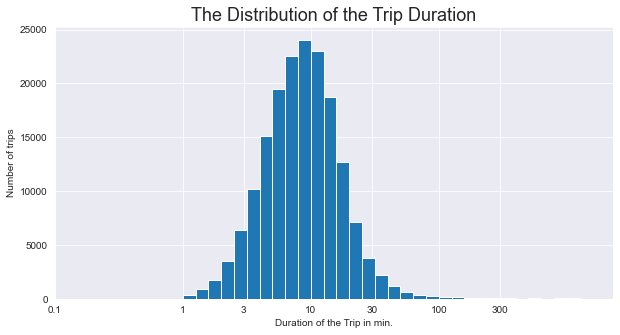

In [19]:
# Convert duration to Minutes and change the scale to log scale
df['duration_minu'] = df['duration_sec'] / 60
binsize_log = 0.1
bins_log = 10 ** np.arange(0, np.log10(df['duration_minu'].max())+binsize_log, binsize_log)
ticks =  [ 0.1 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(i) for i in ticks]

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'duration_minu', bins = bins_log)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Duration of the Trip in min.')
plt.ylabel('Number of trips')
plt.title('The Distribution of the Trip Duration', fontsize=18)
plt.show();

#### Observation: From the last charts we discovered that, The most trip duration arount 10 min for about to max 100 min and minum 2 min.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In the members gender dirtribution we have other value not valuable in the outcome so we have to remove it from the chart. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In the days in the week distribution we have change the form of the data and extract the day of the week in new column and view the distribution. then convert the vlaues to percentage to get readable chart.
For the duration distribution, we have to convert the duration to minutes and then set log scale for best show the distribution chart.

<br>

<hr>

<a id='be'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in the
data.

### Trip Duration VS Gender

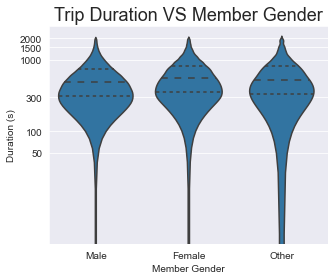

In [20]:
df = df.query("duration_sec < 2000")
# Show the violin plot for the user type
y_ticks = [50, 100, 300, 1000, 1500, 2000]
y_labels = [50, 100, 300, 1000, 1500, 2000]

plt.figure(figsize=[5, 4])
sb.violinplot(data=df, x='member_gender', y='duration_sec', color=sb.color_palette()[0], inner='quartile')
plt.yscale('log')
plt.yticks(y_ticks, y_labels)
plt.xlabel('Member Gender')
plt.ylabel('Duration (s)')
plt.title('Trip Duration VS Member Gender', fontsize=18)
plt.show()

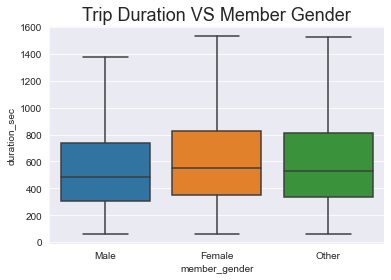

In [21]:
# Show detials from anther chart boxplot
sb.boxplot(x='member_gender', y='duration_sec', data = df, showfliers = False)
plt.title('Trip Duration VS Member Gender', fontsize=18)
plt.show()

From the last charts we found that, the fenale use the bikes for long trip more than the male.

### Trip Duration VS User Type

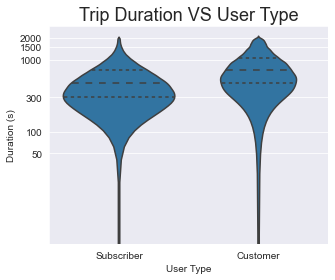

In [22]:
df = df.query("duration_sec < 2000")
# Show the violin plot for the user type
y_ticks = [50, 100, 300, 1000, 1500, 2000]
y_labels = [50, 100, 300, 1000, 1500, 2000]

plt.figure(figsize=[5, 4])
sb.violinplot(data=df, x='user_type', y='duration_sec', color=sb.color_palette()[0], inner='quartile')
plt.yscale('log')
plt.yticks(y_ticks, y_labels)
plt.xlabel('User Type')
plt.ylabel('Duration (s)')
plt.title('Trip Duration VS User Type', fontsize=18)
plt.show()

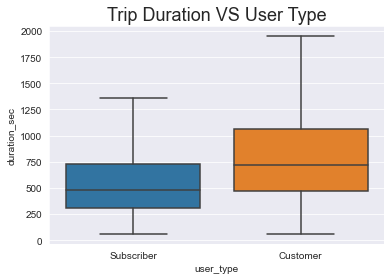

In [23]:
# Show detials from anther chart boxplot
sb.boxplot(x='user_type', y='duration_sec', data = df, showfliers = False)
plt.title('Trip Duration VS User Type', fontsize=18)
plt.show()

From the last charts we found that, the customer use the bikes for long trip more than the subscriber however the number of the subscriber more than the custmers.

### Trip Duration VS User Age

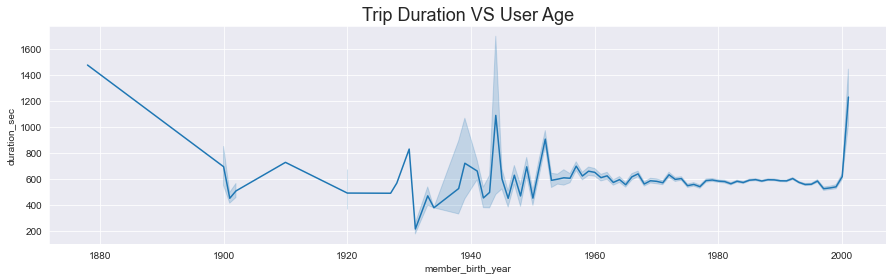

In [24]:
# Show the Trip Duration VS Member Birth Year in line plot

plt.figure(figsize=[15, 4])
sb.lineplot(data=df, x="member_birth_year", y="duration_sec")
plt.title('Trip Duration VS User Age', fontsize=18)
plt.show()

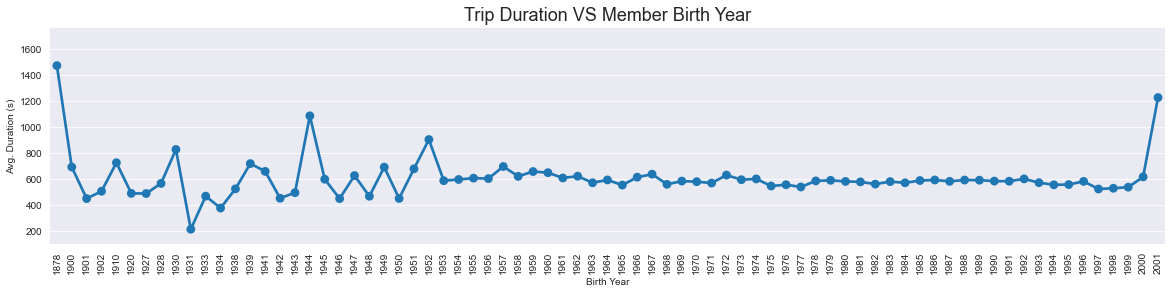

In [25]:
# Show the details of the Trip Duration VS Member Birth Year in line plot

plt.figure(figsize=[20, 4])
sb.pointplot(data=df, x='member_birth_year', y='duration_sec', errwidth=0)
plt.xticks(rotation=90)
plt.xlabel('Birth Year')
plt.ylabel('Avg. Duration (s)');
plt.title('Trip Duration VS Member Birth Year', fontsize=18)
plt.show()

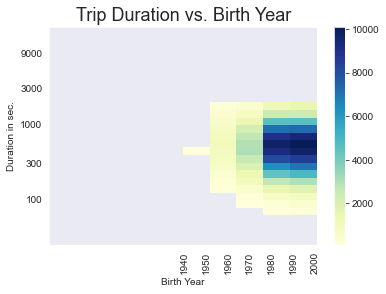

In [26]:
# Drwa the heatmap for finding the relation between  Trip Duration and Birth Year.

bins = 10 ** np.arange(1.4, 4.3+0.1, 0.1)

y_ticks = [100, 300, 1000, 3000, 9000]
y_labels = [100, 300, 1000, 3000, 9000]

x_ticks = [1940, 1950, 1960, 1970, 1980, 1990, 2000]
x_labels = [1940, 1950, 1960, 1970, 1980, 1990, 2000]

plt.hist2d(data=df, x='member_birth_year', y='duration_sec', cmap='YlGnBu', cmin=100, bins=[10, bins])
plt.colorbar()
plt.yscale('log')
plt.yticks(y_ticks, y_labels)
plt.xticks(x_ticks, x_labels, rotation=90)
plt.xlabel('Birth Year')
plt.ylabel('Duration in sec.');
plt.title('Trip Duration vs. Birth Year', fontsize=18)
plt.show()

From the last chart we found that, the largest number of people are around 1985 member birth year with duration 800 sec.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the charts we found that, there is relation between trip duration and the age "yaer of birth". 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, from the charts we fount a relation between the duration and member gender and user type. 

<hr>

<a id='me'></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further.

#### Discover the relatin between the three features user type, member gender, and the trip duration.

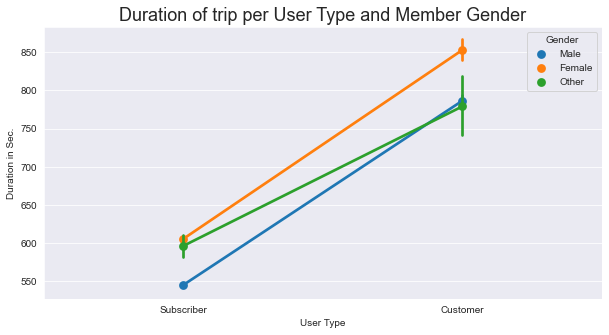

In [27]:
# Show the bar plot for the investigate the relation between more than two variable

plt.figure(figsize=(10,5))
pl = sb.pointplot(data=df, x='user_type', y='duration_sec', hue='member_gender')
plt.xlabel('User Type')
plt.ylabel('Duration in Sec.')
leg = pl.legend()
leg.set_title('Gender')
#pl = plt.gca();
plt.title('Duration of trip per User Type and Member Gender', fontsize=18)
plt.show()

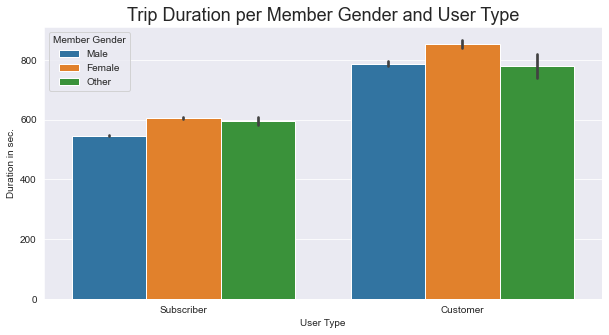

In [28]:
# Show the bar plot for the investigate the relation between more than two variable

plt.figure(figsize = [10, 5])
pl = sb.barplot(data=df, x='user_type', y = 'duration_sec', hue='member_gender')
plt.xlabel('User Type')
plt.ylabel('Duration in sec.')
leg = pl.legend()
leg.set_title('Member Gender')
plt.title('Trip Duration per Member Gender and User Type', fontsize=18)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There is highly relation between the user type and the duration sepcialy for female gender where the femail gender for the user type "Customer" 

### Were there any interesting or surprising interactions between features?

Ther is interaction between the user type "customer" and the member gernder.